**Pre-requisites:**

PDF's, CDF's, distribution plots, types of distribution, difference between distribution, histograms and their types, [KL divergence](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810), [Jensen-Shannon distance](https://scipy.github.io/devdocs/generated/scipy.spatial.distance.jensenshannon.html)




In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import kl_div
from scipy.special import rel_entr
from scipy.spatial.distance import jensenshannon

In [25]:
#! two reviews to compare
review_1 = np.array([5,5,5,5,3,2,2,1,1,1])
review_2 = np.array([4,4,4,4,3,3,3,2,2,1])

In [30]:
def get_pdf(input_array):

    counts, bin_edges = np.histogram(input_array, bins=[1,2,3,4,5,6] 
                                    ,density = True)
    pdf = counts/(sum(counts))

    plt.plot(bin_edges[1:],pdf)
    plt.show();

    return pdf

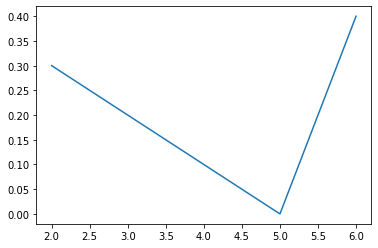

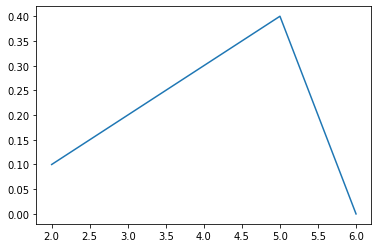

In [31]:
pdf_review_1 = get_pdf(review_1)
pdf_review_2 = get_pdf(review_2)

In [24]:
pdf_review_1

array([0.3, 0.2, 0.1, 0. , 0.4])

In [63]:
rating_1=review_1.sum(axis=0)/len(review_1)
rating_2 = review_2.sum(axis=0)/len(review_2)
print(f'Ratings for two sets of reviews {rating_1} & {rating_2}')

Ratings for two sets of reviews 3.0 & 3.2


In [22]:
print('kl_divergence direct reviews',sum(kl_div(review_1,review_2)))
print('kl_diver pdf',sum(kl_div(pdf_review_1,pdf_review_2))) #does not work for zero

kl_divergence direct reviews 1.4547162327316459
kl_diver pdf inf


As seen, KL divergence can't handle '0', a complete explanation here: https://mathoverflow.net/questions/72668/how-to-compute-kl-divergence-when-pmf-contains-0s 

Hence we compute jensen-shannon distance, it provides a smoothed and normalized version of KL divergence, with scores between 0 (identical) and 1 (maximally different). Also it can handle zeroes: 

In [26]:
#JS distance
#print('kl_divergence direct reviews',kl_divergence(review_1,review_2))
print('JS distance original distribution: ',jensenshannon(trial_1_pdf,trial_1_pdf))


print('JS distance pdf: ',jensenshannon(trial_1_pdf,trial_1_pdf))
#print('kl_diver pdf',kl_divergence(pdf_review_1,pdf_review_2))

JS distance original distribution:  0.0
JS distance pdf:  0.0


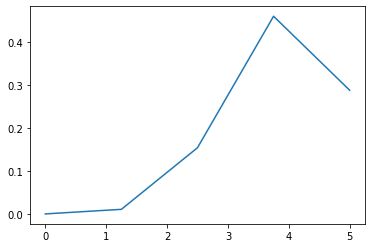

In [3]:
#! ideal review distribution using trunchnorm
from scipy.stats import truncnorm
myclip_a = 0
myclip_b = 5
my_mean = 4
my_std = 1

a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
x_range = np.linspace(0,5,5)
ideal_rating=truncnorm.pdf(x_range, a, b, loc = my_mean, scale = my_std)
plt.plot(x_range, ideal_rating)

In [66]:
#JS distance
#print('kl_divergence direct reviews',kl_divergence(review_1,review_2))
js_1_ideal=jensenshannon(pdf_review_1,ideal_rating)
print('JS distance pdf 1: ',js_1_ideal)

js_2_ideal=jensenshannon(pdf_review_2,ideal_rating)
print('JS distance pdf 2: ',js_2_ideal)
#! can see that pdf 2 is closer!

JS distance pdf 1:  0.5791962384914825
JS distance pdf 2:  0.4541324981956016


In [46]:
normalised_rating_1 = rating_1 - js_1_ideal
normalised_rating_2 = rating_2 - js_2_ideal

In [8]:
#! compare for 3 real life examples.

mic_pdf = np.array([0.14,0.04,0.09,0.24,0.50]) #3.9 https://www.amazon.in/dp/B076B8G5D8#customerReviews 
boult_pdf =np.array([0.09,0.04,0.1,0.27,0.50]) #4.1 https://www.amazon.in/Boult-Audio-BassBuds-X1-Earphones/dp/B08CPLTK9B/ref=sr_1_3
ikigai_pdf = np.array([0.02,0.01,0.06,0.19,0.72]) #4.6 https://www.amazon.in/Ikigai-H%C3%A9ctor-Garc%C3%ADa/dp/178633089X/ref=zg_bs_books_1 

In [58]:
jensenshannon(mic_pdf,ideal_rating)

0.27697104575912446

In [59]:
jensenshannon(boult_pdf,ideal_rating)

0.2456924462616504

In [60]:
jensenshannon(ikigai_pdf,ideal_rating)

0.13929656616322375